In [43]:
from od_client_authentication import ODAuthentication
from od_client_recognizer import ODRecognizer
from load_audio import load_wav
from sklearn.metrics import balanced_accuracy_score
import time
import glob
import threading

In [44]:
USERNAME = 'sergey_verbitskiy3'
PASSWORD = 'tghskdn$dsfsd'

In [45]:
token = '66d7c257ee3184a771ba99de9148b6f5b4fc110501350a8f601e2d6dd805e7ed'

In [46]:
recognizer = ODRecognizer(token)

Token is valid


In [47]:
recognizer.recognized_seconds_by_token()

Successfully received the number of recognized seconds for the token:
For Short Mode: 45154.52
For Long Mode: 156666.51
Overall: 201821.03


{'short_mode': 45154.52, 'long_mode': 156666.51, 'all': 201821.03}

In [55]:
files_oleg = glob.glob('validation/1. Ассистент Олег/*.wav')
files_not_oleg = glob.glob('validation/2. Люди (муж.голос)/*.wav') + glob.glob('validation/3. Автоответчики (не Олег)/*.wav')

In [57]:
%%time
targets = []
predicts = []
all_duration = 0
delays = []

for file in files_oleg:
    audio, sr, dtype, duration = load_wav(file, max_duration=15)
    time_start = time.time()
    result = recognizer.recognize(audio=audio, sr=sr, dtype=dtype, mode='short')
    if result is None:
        predicts.append('not_oleg')
    else:
        predicts.append(result)
        
    delays.append(time.time() - time_start)
    targets.append('oleg')
    all_duration += duration
    
    
for file in files_not_oleg:
    audio, sr, dtype, duration = load_wav(file, max_duration=15)
    time_start = time.time()
    result = recognizer.recognize(audio=audio, sr=sr, dtype=dtype, mode='short')
    if result is None:
        predicts.append('not_oleg')
    else:
        predicts.append(result)
    delays.append(time.time() - time_start)
    targets.append('not_oleg')
    all_duration += duration

Audio data does not contain speech
Wall time: 1min 27s


In [53]:
balanced_accuracy_score(targets, predicts)

0.9615384615384616

In [10]:
all_duration

1916.2400000000002

In [11]:
sum(delays) / len(delays)

0.5756721372728224

In [12]:
%%time

targets = []
predicts = []
all_duration = 0
delays = []

for file in files_oleg:
    audio, sr, dtype, duration = load_wav(file)
    if duration < 5.1:
        continue
    time_start = time.time()
    result = recognizer.recognize(audio=audio, sr=sr, dtype=dtype, mode='long')
    delays.append(time.time() - time_start)
    if result is None:
        predicts.append('not_oleg')
    else:
        predicts.append(result.results.mode())
    targets.append('oleg')
    
    all_duration += duration
    
    
for file in files_not_oleg:
    audio, sr, dtype, duration = load_wav(file)
    if duration < 5.1:
        continue
    time_start = time.time()
    result = recognizer.recognize(audio=audio, sr=sr, dtype=dtype, mode='long')
    delays.append(time.time() - time_start)
    if result is None:
        predicts.append('not_oleg')
    else:
        predicts.append(result.results.mode())
    targets.append('not_oleg')
    
    all_duration += duration

Audio data does not contain speech
Wall time: 2min 4s


In [23]:
sum(delays) / len(delays)

0.8745505116510053

In [16]:
predicts[0].item()

'oleg'

In [27]:
all_duration / 120

38.50816666666664

In [22]:
balanced_accuracy_score(targets, list(map(lambda x: x.item() if type(x) != type('') else x, predicts)))

1.0

In [ ]:
# multiple clients test
short_file = glob.glob('Звуковые дорожки/1. Ассистент Олег/*.wav')[0]
audio, sr, dtype, duration = load_wav(short_file)

In [50]:
times = []

for clients in range(1, 50):
    threads = []
    
    for i in range(clients):
        t = threading.Thread(target=recognizer.recognize, args=[audio, sr, dtype, 'short'])
        threads.append(t)
    
    time_start = time.time()
    
    for i in range(clients):
        threads[i].start()
        
        
    for i in range(clients):
        threads[i].join()
        
    times.append(time.time() - time_start)

In [52]:
import matplotlib.pyplot as plt

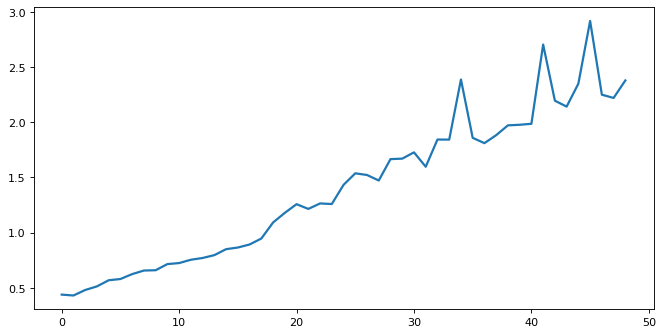

In [61]:
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(times, linewidth=2)

In [28]:
audio, sr, dtype, duration = load_wav('test_audios/test10.wav')

In [29]:
recognizer.recognize(audio=audio, sr=sr, dtype=dtype, mode='long')

,start,end,duration,confidence,results
0,0.2,7,6.8,0.02,not_oleg


In [19]:
recognizer.recognize(audio=audio, sr=sr, dtype=dtype, mode='long')

,start,end,duration,confidence,results
0,2.7,5.1,2.4,1,oleg
1,5.3,6.3,1.0,1,oleg
2,9.3,16.0,6.7,1,oleg


In [31]:
%%time
audio, sr, dtype, duration = load_wav('test_audios/test7.wav')

Wall time: 230 ms


In [32]:
times = []

for clients in range(1, 10):
    threads = []
    
    for i in range(clients):
        t = threading.Thread(target=recognizer.recognize, args=[audio, sr, dtype, 'long'])
        threads.append(t)
    
    time_start = time.time()
    
    for i in range(clients):
        threads[i].start()
        
        
    for i in range(clients):
        threads[i].join()
        
    times.append(time.time() - time_start)

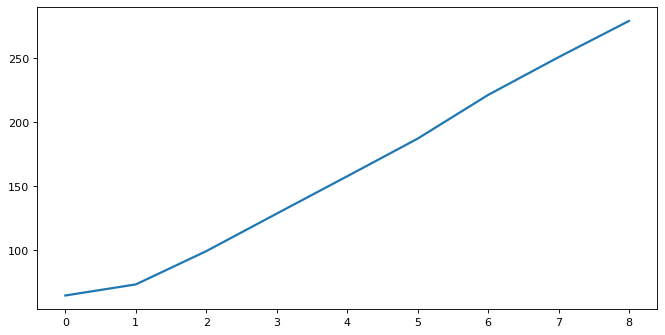

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5), dpi=80)
plt.plot(times, linewidth=2)